# Emerging Technology Tasks
Solutions to my tasks 2020 assessment for the Emerging Technology module. 
<br/>Author: Nathan Garrihy (**G00354922**)

---
## Task 1
---
### Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places.
I used a googol value (10 to the power of 100) to store the numbers on the right side of the decimal place as a whole number to allow 100 decimal place output to screen. The program iterates a few guesses to what the sqrt is and then returns the square root of 2 value when the guess is equal to the previous guess! Finally, I print out "1." followed by the final value which contains the numbers to the right of the decimal place.

[1] Newton Raphson's Method - https://surajregmi.medium.com/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64

[2] NASA's Square Root of 2 to 1 million decimals - https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil

![NewtonRaphson](https://media.geeksforgeeks.org/wp-content/cdn-uploads/newtonraphsonformula.png "Newton's Method")


In [16]:
def Sqrt2():
    # This constant is not fully required but can be changed
    # in order to find the square root of a different number
    SQRTNUM = 2;
    # 'num' variable  = num value of 2 * googol^2. This
    # moves numbers to the left side of the decimal place
    num = SQRTNUM *(GOOGOL)**SQRTNUM
    a = 0
    b = GOOGOL

    # Loop until accuracy is sufficiant
    # Keeps running until a == b
    while a != b:
        # Set a to b
        a = b
        # Get the floor division + Bit shift num 1 place to the right
        b = (a+(num//a)) >> 1
    # finalVal contains the numbers to the right of decimal place
    finalVal = b-(GOOGOL)
    # Code for potential future re-use could
    # change SQRTNUM and return leftNum and finalVaL
    # leftNum = int((b - finalVal)/GOOGOL)
    
    return "1.%d"%finalVal

Print square root of 2

In [17]:
print(Sqrt2())

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


#### ReadME file is located on the main branch of my github repository
<br/>
Since we were explicitly tasked with finding the square root of 2 and not just a general square root function, I found it fit to return the number 1 before adding the numbers to the right of the decimal place. Anyone could reasonably assume that the square root of 2 is 1 point something, as is the case for finding the square root for many other numbers which, I feel this technique just made things a bit quicker code-wise considering the task that was at hand.

---
## Task 2
---
### Using scipy.stats to verify this value  of a given table and calculate the associated p value
Here, I perform a Chi-square test of independence of variables in a contingency table. This tests the values stored in whiteCol, blueCol and noCol and returns values which can be used to determine whether or not the categorical variables
are independent. 

[1] scipy.stats documentation - https://docs.scipy.org/doc/scipy/reference/stats.html

[2] scipy.stats.chi2contingency documentation - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html 
<br/>
<br/>
The degrees of freedom which is the number 
of independent observations in a set of data. It also returns the 
expected frequencies, based on the marginal sums of the table.

In [18]:
# scipy.stats module for probability distributions and 
import scipy.stats as stats

# Table row values stored as arrays
whiteCol = [90, 60, 104, 95]
blueCol = [30, 50, 51, 20]
noCol = [30, 40, 45, 35]

# Values put into 2-Dimentional Array
a = [whiteCol]+[blueCol]+[noCol]

# Use stats.chi2_contingency() function to compute the chi-square 
# statistic (V) and p-value for the test of the observed frequencies 
# in the contingency table (p). The degrees of freedom which is the number 
# of independent observations in a set of data (dof). It also returns the 
# expected frequencies, based on the marginal sums of the table (expected).
V, p, dof, expected = stats.chi2_contingency(a)

Print stats.chi2_contingency() values to screen

In [14]:
print("========================================================\n",
      "Chi-squared value based on the table =",V,"\n",
      "The p-value of the test =", p,"\n",
      "Degrees of freedom =", dof,"\n",
      "The expected frequencies:\n", expected,"\n"
     "========================================================")

 Chi-squared value based on the table = 24.5712028585826 
 The p-value of the test = 0.0004098425861096696 
 Degrees of freedom = 6 
 The expected frequencies:
 [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]] 


![ChiSquaredDistribution](https://www.statisticshowto.com/wp-content/uploads/2014/11/chi-square-distribution.png "Chi Squared Distribution")
##### Chi Squared Distribution
In this graph the y-axis represents the p value and the x-axis represents the value for x squared. Each coloured line represents a different value for degrees of freedom.

- The [Wikipedia article](https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096) stated that the approximate chi-squared value based on the table was 24.6, which was correct as my result was 24.57, which rounds up to 24.6.
- The 'p' value was <0.001 which is lower than the significance level (0.05).
- The 'degrees of freedom' = '(r-1)(c-1)' where r = total number of rows and c = total number of columns. In this case the degrees of freedom is 6, so there are 6 independent values that the statistical analysis can estimate.
- The expected frequencies are estimated frequencies for each cell based on our values.

**The null hypothesis is that each person's neighbourhood of residence is independent of the person's occupational classification. I used this chi square test to check if a relationship exists between the categories and based on my results, I reject this null hypothesis. There is no clear evidence to make me accept this hypothesis as a correlation between neighbourhood of residence and occupational classification can be seen, proving lack of independence**

---
## Task 3
---
### Research STDEV.P and STDEV.S excel functions and demonstrate their functionality and the differences between them

In this piece of code, I use numpy, which offers comprehensive mathematical functions, random number generators, linear algebra routines and more. In this example I use numPy to calculate the population standard deviation, as well as the sample standard deviation on the same sample data set in order to show that they do not do the same thing.

[1] stdev.s documentation - https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

[2] stdev.p documentation - https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

[3] standard deviation - http://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html

In [28]:
import numpy as np

## data set of numbers
x = [0,2,4,6,8,10,12,14,16,18,20]

#print(np.std(x))
## np.std returns population standard deviation
print("Population deviation =",np.sqrt(np.sum((x-np.mean(x))**2)/len(x)))
print("Sample deviation =",np.sqrt(np.sum((x-np.mean(x))**2)/len(x)-1))

Population deviation = 6.324555320336759
Sample deviation = 6.244997998398398


*Standard deviation is a measure of how widely values are dispersed from the mean value.*

**STDEV.P**
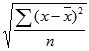
n = sample size
<br/>
x = sample mean average
<br/><br/>
The **population** Standard Deviation is a calculation which is performed on a full data set. In excel, STEV.P assumes that its arguments are the entire population of data. Stev.p calculates standard deviation based on the entire population value given as arguments.<br/>
e.g. All of the people who live in Galway

***STDEV.S***
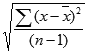
n = sample size
<br/>
x = sample mean average
<br/><br/>
The **sample** standard deviation is performed on a data set which is a subset of the population data. i.e. The sample data set must be smaller than that of the population data set and its values must be part of the population sample. <br/>
e.g. 1000 people who live in Galway

We use **population standard deviation** when we are certain that we have the entire population. We also use it when we have some sample data and only want to find the standard deviation of this data set, without generalizing our findings to the entire larger population.
<br/>
We use **Sample standard deviation** when we have a sample of a larger population and want to generalize our findings from the sample to get a reasonabl estimate on what the standard deviation is.

**When finding standard deviation, if you do not have the full data set and you only have a "sample" of the data, it is essential to use the stdev.s function, as since we do not know the whole data set, we cannot just guess what the rest of the numbers will be and must make an estimate based on the numbers we already have. As we see in the above data set, we have numbers from 0 - 20 going up in twos. If we assume this is a complete data set, it is ok to use population deviation. However, if we know this is an incomplete data set, there is no way to tell what the next numbers will be / how many there will be so this is where a sample standard deviation is effective at providing us with an accurate standard deviation of a sample data set.**

---
## Task 4
---
### Use scikit-learn to apply k Nearest Neighbours clustering to Fisher’s famous Iris data set
scikit-learn provides a copy of Fisher's famous Iris data set which is easily obtained and provides some useful functions we can use on the data set. <br/>https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html<br/> Scikit-learn provided me with a decent plot for the iris dataset: <br/>https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html<br/> this plot represents each species of flower with its identifying colour and the difference between each species is already evident without even performing any sort of classification. The visible differences between the flower species' show me that a knn classification model will be an effective way to predict a species of iris.

Text(0, 0.5, 'Sepal width')

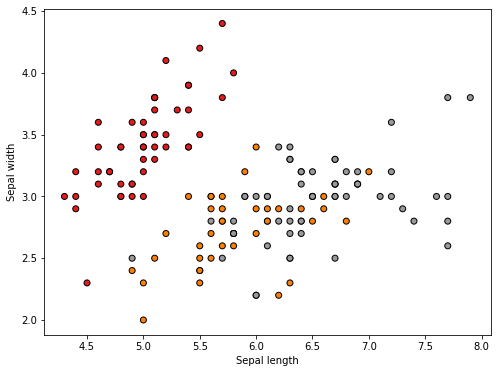

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Create iris Bunch object w/ iris dataset and its attributes
iris = load_iris()
X = iris.data
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

I then used scikit-learn model selection's train_test_split function to split up the iris data into 2 pieces of data ("Training" and "Testing") as training and testing on the same data isn't good practice, training and testing on different sets of data will lead to a better estimate on how well the model is likely to perform on unseen data.

In [4]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

Here, I import the KNeighborsClassifier class from sklearn's neighbors module.
https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
I then look over a range of 1 to 25 populating the class, setting the k value as 1... 2... 3... all the way up to 25. I then assigned this data to a plot in order to show the optimal values for K (in knn) by checking its relationship to the testing accuracy which I acquired earlier. It is also said that an optimal value for k is the square root of the total number of samples, in my case there were 25 samples so when I checked the plot to see if 5 would be a good value I saw that there was a high testing accuracy for a value of 5 for k so I will use this later.

In [5]:
#import KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy
from sklearn import metrics

#Try run from 1 to 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

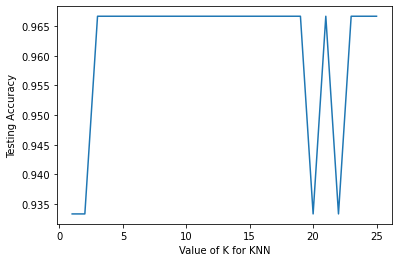

In [6]:
%matplotlib inline

# plots the relationship between k and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

# set optimal value for k in knn
n_neighbors=5

### Nearest neighbors classification, instance based/non generalizing learning plots decision boundaries for each class
With nearest neighbors classification, a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
The basic nearest neighbors classification uses uniform weights, this assigns a value to a query point based on a single majority vote on it's nearest neighbors.
I first re-populate X with the first 2 features of iris.data to avoid Value Errors when creating the classification plot. Next, I create 2 colour maps for the different elements of the plot and plot the decision boundary, also assigning a colour to each appropriate point in the mesh.
Then, I populate my KNeighborsClassifier with my optimal value for k in knn, which is 5. After this, I create my new data set for my classification plot and put this data into a colour plot using the values I've just created. Finally, I plot the training plots too and finalize the plot by adding a title and appropriate labels.

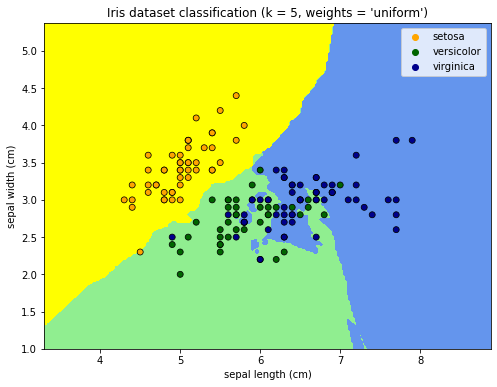

In [7]:
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

X = iris.data[:, :2] # only take the first two features.

# Create color maps
cmap_light = ListedColormap(['yellow', 'lightgreen', 'cornflowerblue'])
cmap_bold = ['orange', 'darkgreen', 'darkblue']

# Plot the decision boundary. For that, we will assign a colour to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# Create an instance of Neighbours Classifier and fit the data.
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X, y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a colour plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris dataset classification (k = %i, weights = '%s')"
            % (n_neighbors, 'uniform'))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

### How this model can be used to make predictions on species of iris:
This model shows that sepal width and length would be a very good indicator of what iris species we are dealing with. While there are some similarities between versicolor and virginica flowers, we can clearly see that on average, the versicolor flowers tend to have a smaller sepal length as well as a slightly smaller sepal width. If we have enough samples, we can easily compare them to this plot, and this is a very effective method of classification. Setose flowers are easily identified as their sepal width and length is normally much different to the other types.
The knn classification finds the similarities between the data we already have and the new data which is provided, it uses these findings to decide which iris species fits into which category and this in turn means that this model itself makes the predictions on species of iris. All that needs to be done is to add more data to the dataset, which could be compared to the current dataset. This in turn would be classified using sklearn's kneighborsclassifier and the new points could easily be added to a newly created plot, showing an accurate estimate of the species of the newly provided points.